# Project: Predicting fuel effeciency
Objective: to predict fuel effeciency based on various engine features
data from https://www.kaggle.com/code/rinichristy/best-predictors-for-fuel-consumption-of-vehicles/input

In [171]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model



In [172]:
df = pd.read_csv("./data.csv")
df.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

# EDA

In [173]:
df
df['Model Year'].min

<bound method Series.min of 0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
941    2022
942    2022
943    2022
944    2022
945    2022
Name: Model Year, Length: 946, dtype: int64>

In [174]:
df.isnull().values.any()

np.False_

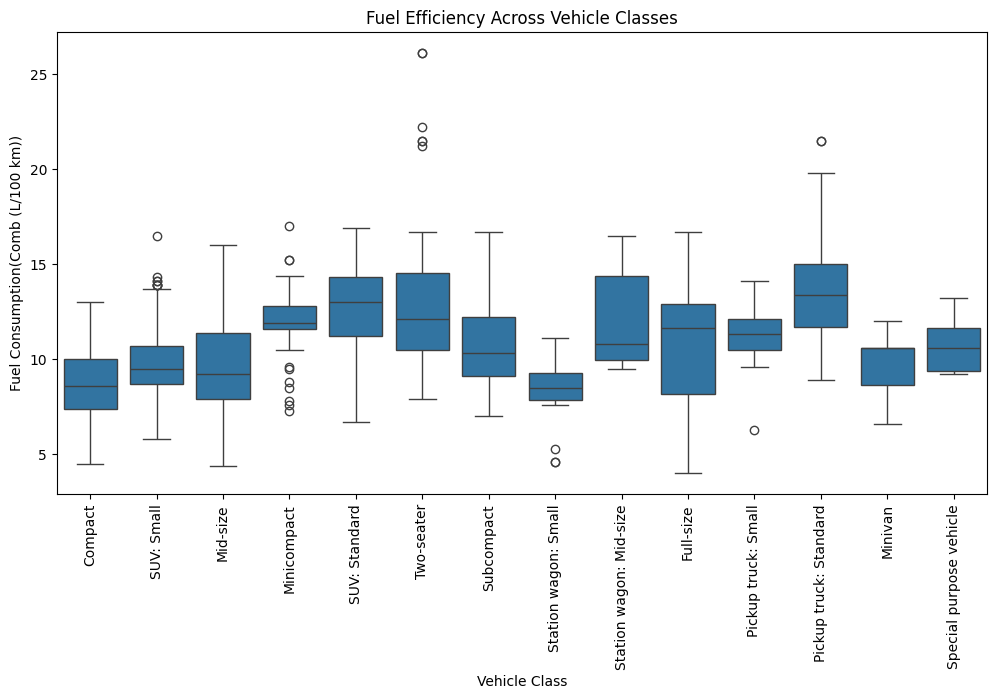

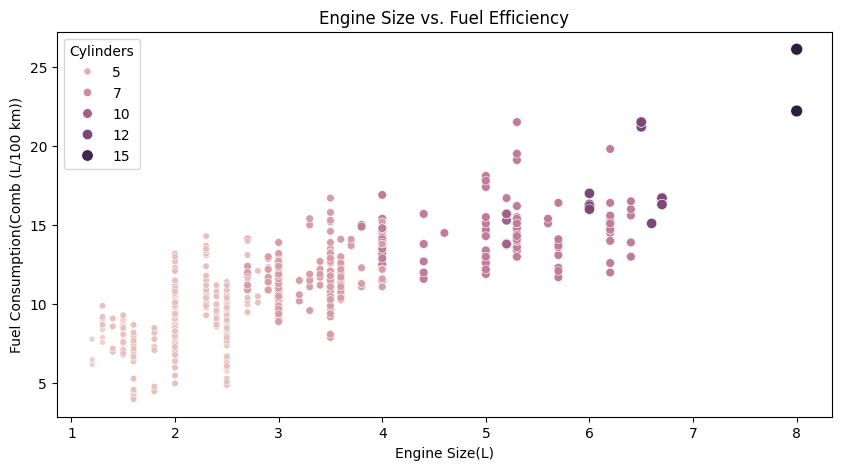

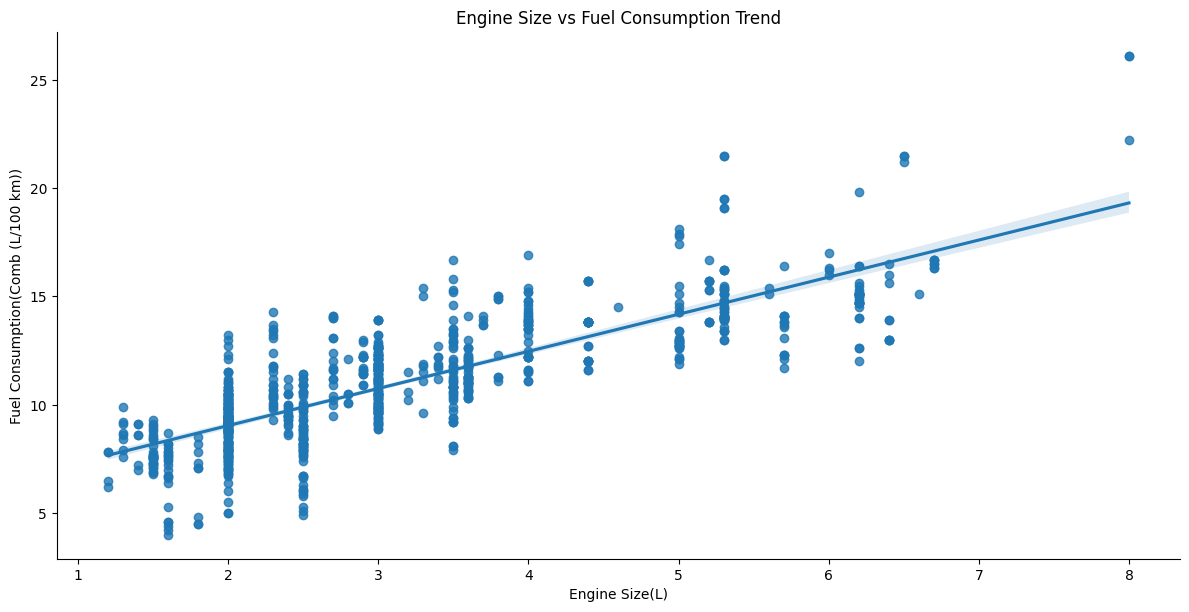

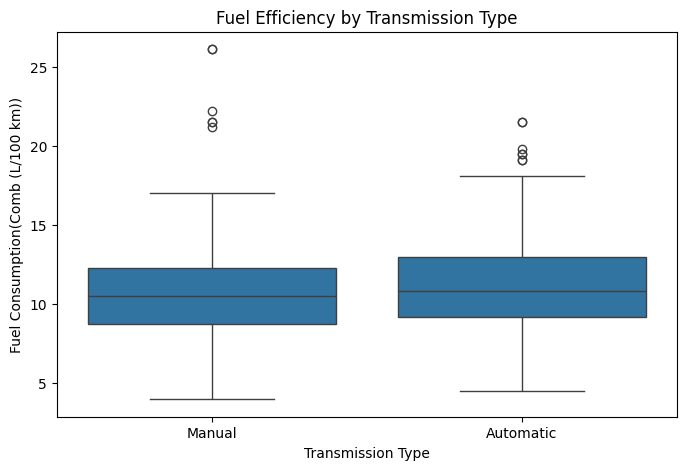

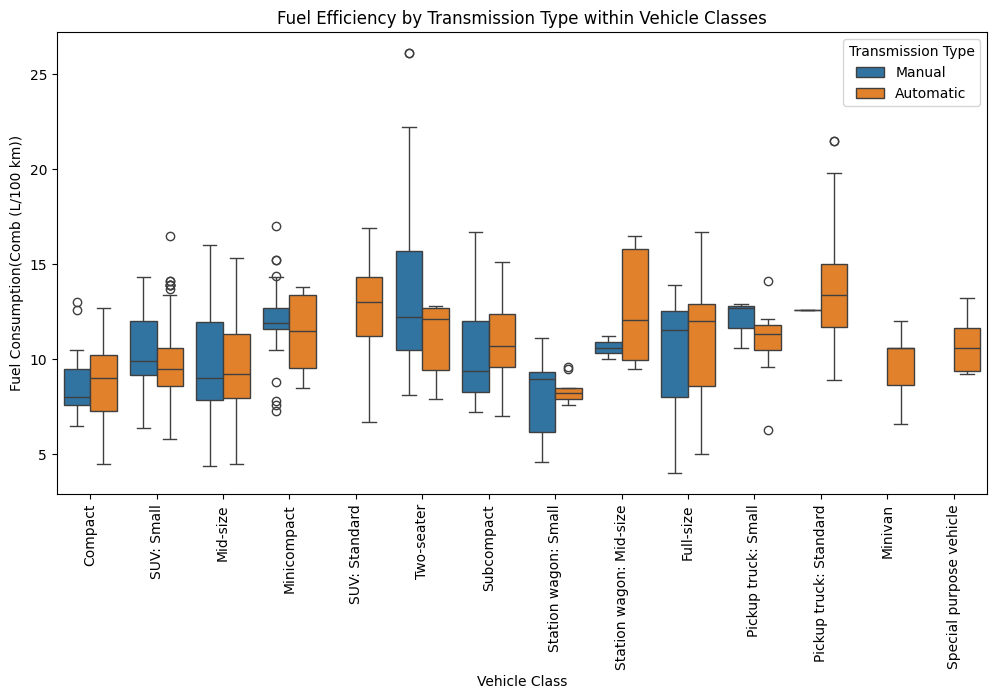

In [175]:

df['Transmission Type'] = df['Transmission'].apply(lambda x: 'Manual' if 'M' in x else 'Automatic')

# Vehicle Class Impact on Fuel Efficiency
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle Class', y='Fuel Consumption(Comb (L/100 km))', data=df)
plt.xticks(rotation=90)
plt.title('Fuel Efficiency Across Vehicle Classes')
plt.show()

# Engine Size & Fuel Efficiency Relationship
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Engine Size(L)', y='Fuel Consumption(Comb (L/100 km))', hue='Cylinders', size='Cylinders', data=df)
plt.title('Engine Size vs. Fuel Efficiency')
plt.show()

# Checking threshold where fuel efficiency drops sharply
sns.lmplot(x='Engine Size(L)', y='Fuel Consumption(Comb (L/100 km))', data=df, aspect=2, height=6)
plt.title('Engine Size vs Fuel Consumption Trend')
plt.show()

# Transmission Type & Efficiency
plt.figure(figsize=(8, 5))
sns.boxplot(x='Transmission Type', y='Fuel Consumption(Comb (L/100 km))', data=df)
plt.title('Fuel Efficiency by Transmission Type')
plt.show()

# Transmission Efficiency within Vehicle Classes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle Class', y='Fuel Consumption(Comb (L/100 km))', hue='Transmission Type', data=df)
plt.xticks(rotation=90)
plt.title('Fuel Efficiency by Transmission Type within Vehicle Classes')
plt.show()


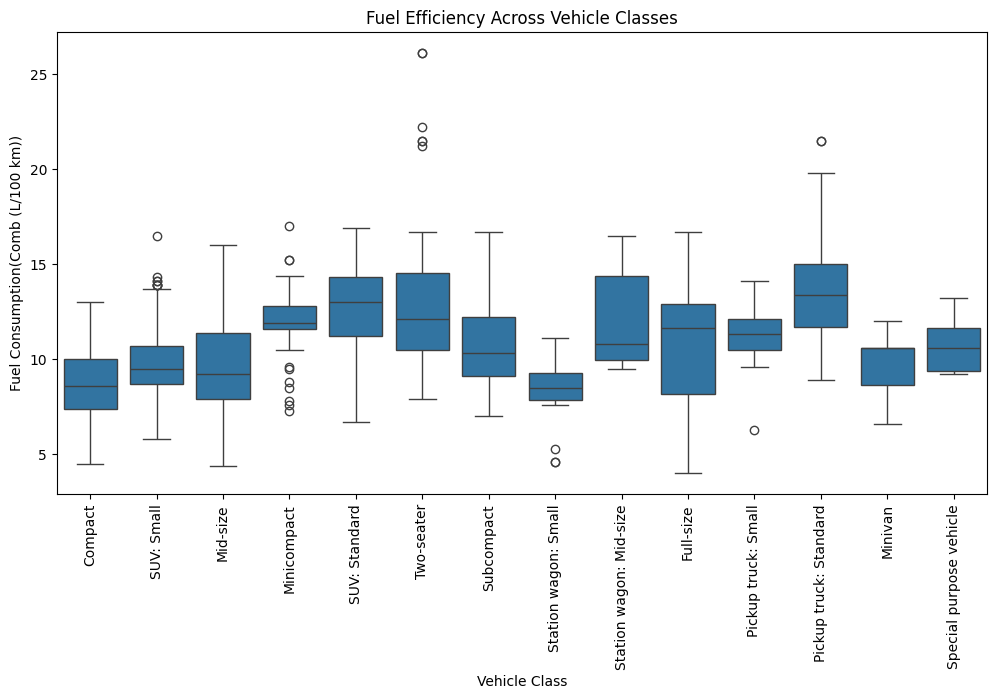

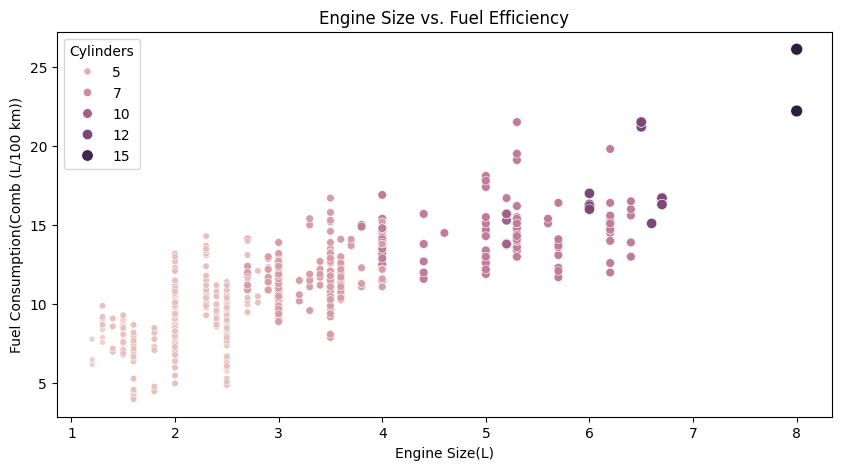

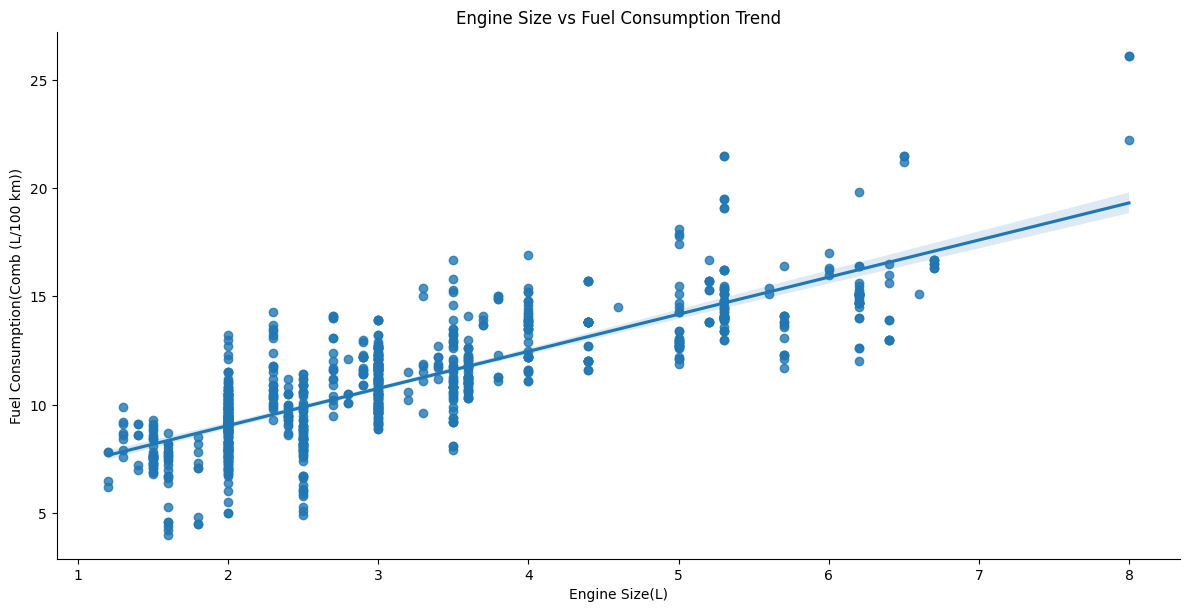

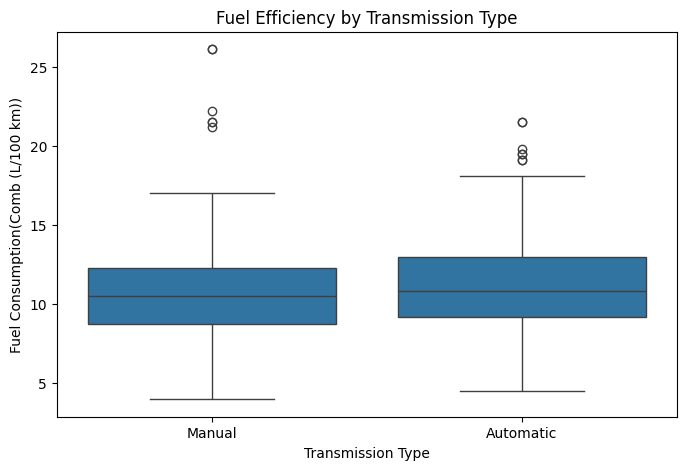

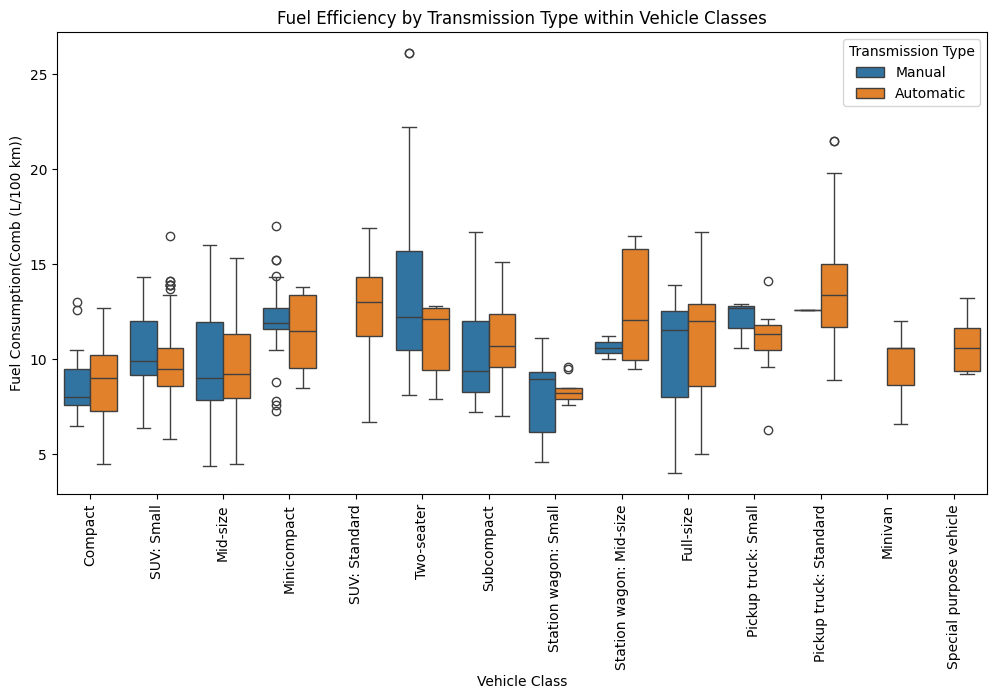

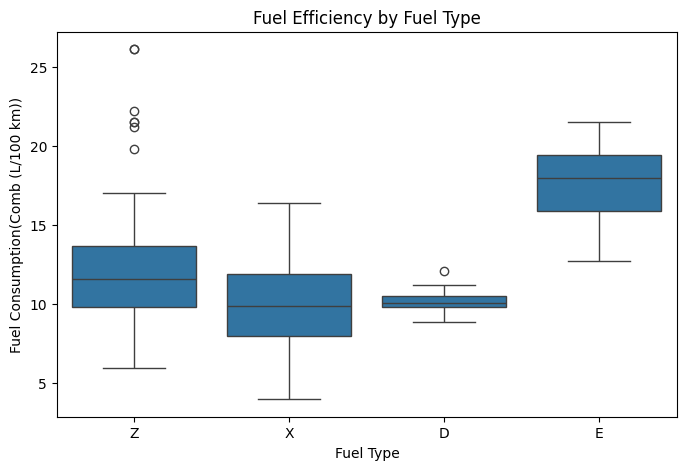

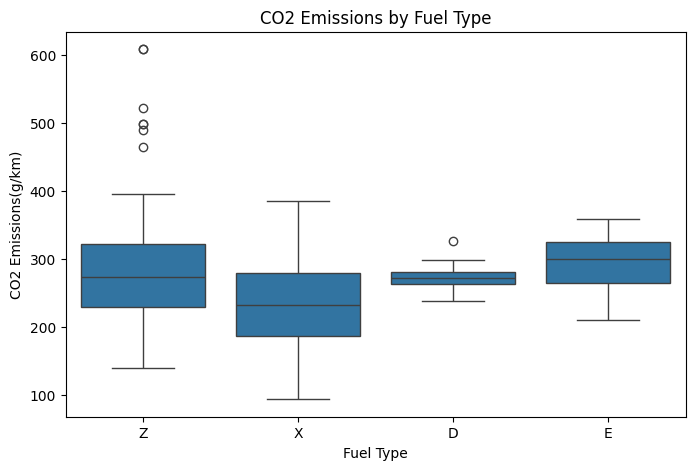

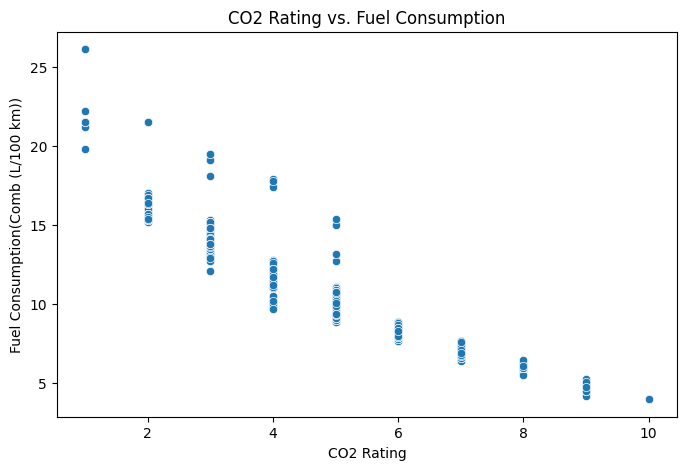

In [176]:


# Convert transmission type into Manual or Automatic
df['Transmission Type'] = df['Transmission'].apply(lambda x: 'Manual' if 'M' in x else 'Automatic')

# Vehicle Class Impact on Fuel Efficiency
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle Class', y='Fuel Consumption(Comb (L/100 km))', data=df)
plt.xticks(rotation=90)
plt.title('Fuel Efficiency Across Vehicle Classes')
plt.show()

# Engine Size & Fuel Efficiency Relationship
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Engine Size(L)', y='Fuel Consumption(Comb (L/100 km))', hue='Cylinders', size='Cylinders', data=df)
plt.title('Engine Size vs. Fuel Efficiency')
plt.show()

# Checking threshold where fuel efficiency drops sharply
sns.lmplot(x='Engine Size(L)', y='Fuel Consumption(Comb (L/100 km))', data=df, aspect=2, height=6)
plt.title('Engine Size vs Fuel Consumption Trend')
plt.show()

# Transmission Type & Efficiency
plt.figure(figsize=(8, 5))
sns.boxplot(x='Transmission Type', y='Fuel Consumption(Comb (L/100 km))', data=df)
plt.title('Fuel Efficiency by Transmission Type')
plt.show()

# Transmission Efficiency within Vehicle Classes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle Class', y='Fuel Consumption(Comb (L/100 km))', hue='Transmission Type', data=df)
plt.xticks(rotation=90)
plt.title('Fuel Efficiency by Transmission Type within Vehicle Classes')
plt.show()

# Fuel Type vs. Fuel Efficiency
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fuel Type', y='Fuel Consumption(Comb (L/100 km))', data=df)
plt.title('Fuel Efficiency by Fuel Type')
plt.show()

# Fuel Type vs. CO2 Emissions
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df)
plt.title('CO2 Emissions by Fuel Type')
plt.show()

# CO2 Rating & Fuel Consumption Relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x='CO2 Rating', y='Fuel Consumption(Comb (L/100 km))', data=df)
plt.title('CO2 Rating vs. Fuel Consumption')
plt.show()


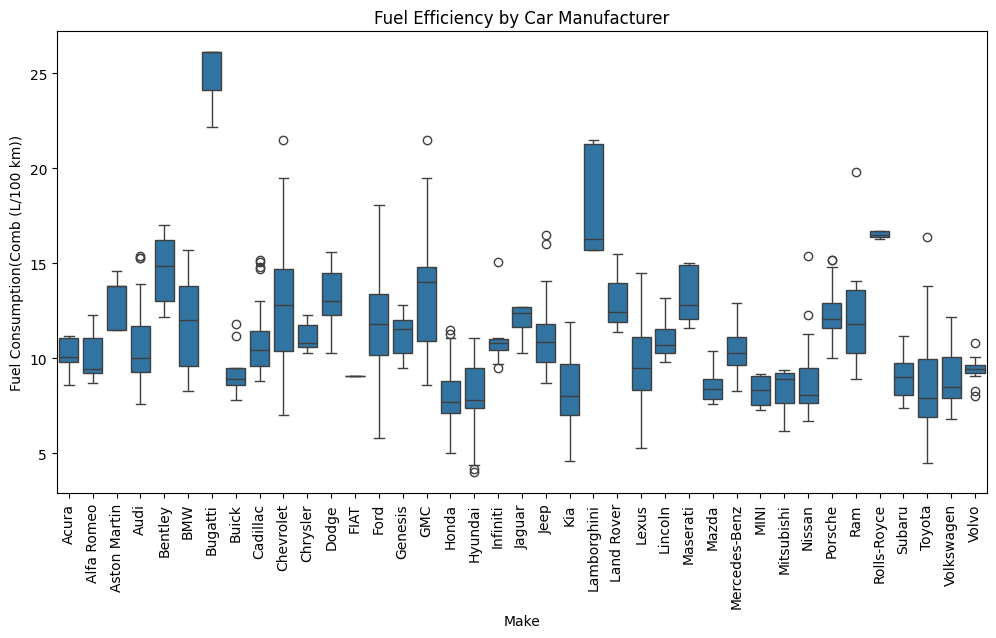

In [177]:

# Efficiency by Car Manufacturer
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Fuel Consumption(Comb (L/100 km))', data=df)
plt.xticks(rotation=90)
plt.title('Fuel Efficiency by Car Manufacturer')
plt.show()


# Since this data set only cantains data of the year 2022 it is not possible to calculate fuel effeciency over the years

<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_41207/1641444032.py:28: SyntaxWarning: invalid escape sequence '\d'
  df['Gears'] = df['Transmission'].str.extract('(\d+)').astype(float)


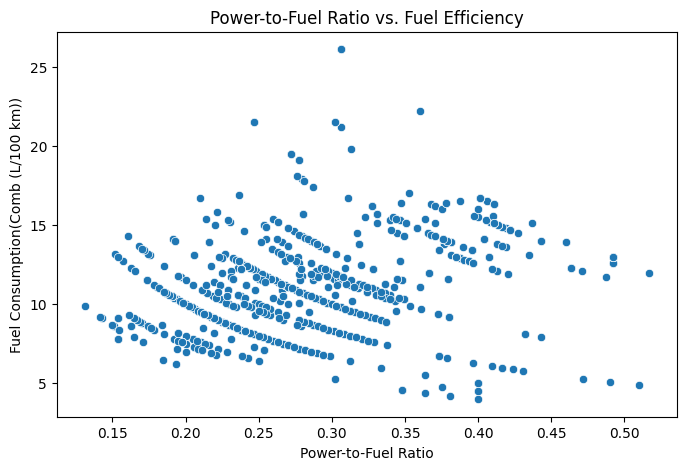

Correlation Matrix:
                                    Power-to-Fuel Ratio  \
Power-to-Fuel Ratio                            1.00000   
Fuel Consumption(Comb (L/100 km))              0.30246   

                                   Fuel Consumption(Comb (L/100 km))  
Power-to-Fuel Ratio                                          0.30246  
Fuel Consumption(Comb (L/100 km))                            1.00000  


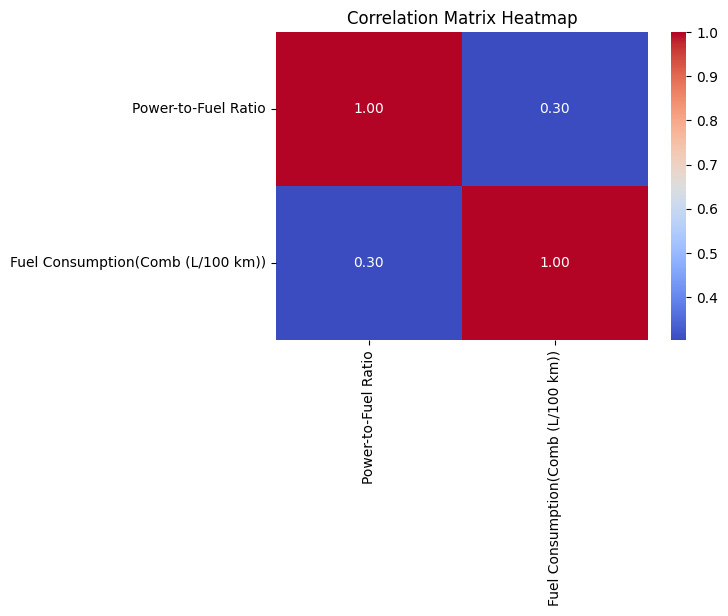

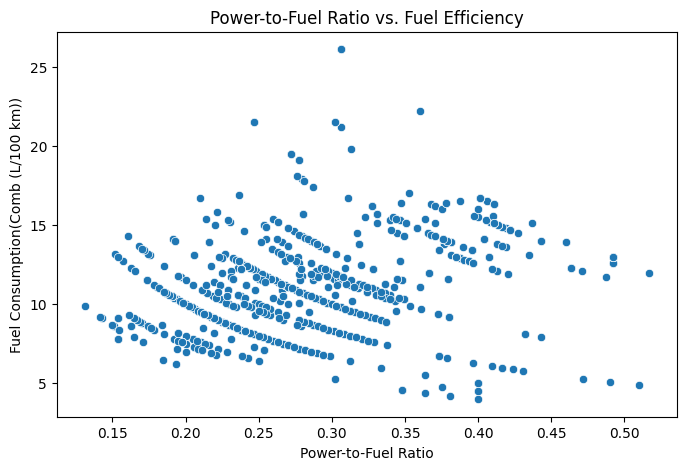

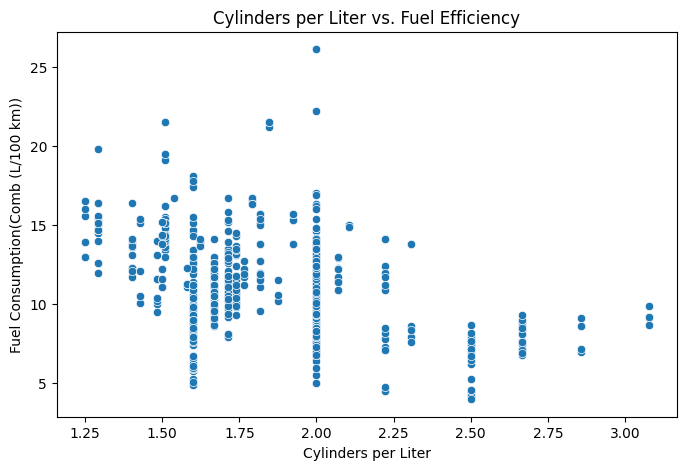

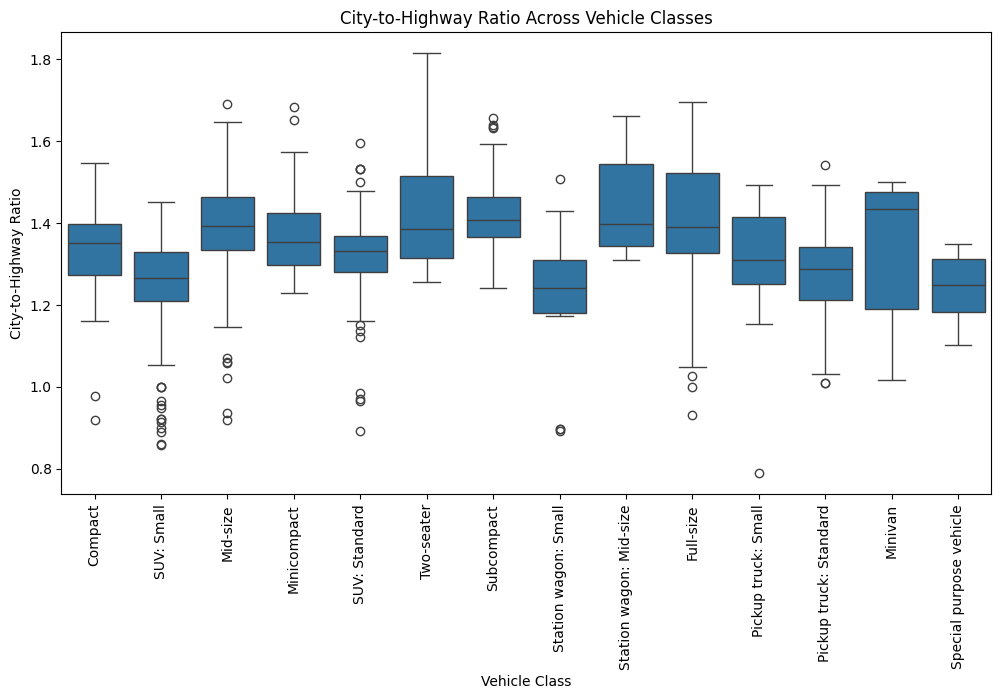

Correlation Matrix:
                                    Power-to-Fuel Ratio  Cylinders per Liter  \
Power-to-Fuel Ratio                           1.000000            -0.622862   
Cylinders per Liter                          -0.622862             1.000000   
City-to-Highway Ratio                         0.238496            -0.211833   
Fuel Consumption(Comb (L/100 km))             0.302460            -0.463590   

                                   City-to-Highway Ratio  \
Power-to-Fuel Ratio                             0.238496   
Cylinders per Liter                            -0.211833   
City-to-Highway Ratio                           1.000000   
Fuel Consumption(Comb (L/100 km))               0.400047   

                                   Fuel Consumption(Comb (L/100 km))  
Power-to-Fuel Ratio                                         0.302460  
Cylinders per Liter                                        -0.463590  
City-to-Highway Ratio                                       0.400047 

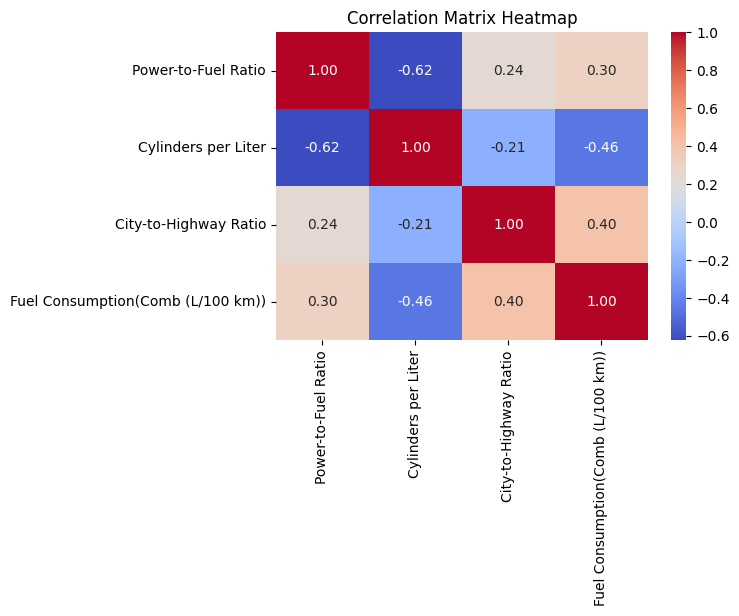

In [178]:

# Create Power-to-Fuel Ratio feature
df['Power-to-Fuel Ratio'] = df['Engine Size(L)'] / df['Fuel Consumption(Comb (L/100 km))']

# Analyze correlation between Power-to-Fuel Ratio and Fuel Efficiency
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Power-to-Fuel Ratio', y='Fuel Consumption(Comb (L/100 km))', data=df)
plt.title('Power-to-Fuel Ratio vs. Fuel Efficiency')
plt.show()

# Check correlation
correlation = df[['Power-to-Fuel Ratio', 'Fuel Consumption(Comb (L/100 km))']].corr()
print("Correlation Matrix:\n", correlation)

# Visualizing the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Create Cylinders per Liter Ratio feature
df['Cylinders per Liter'] = df['Cylinders'] / df['Engine Size(L)']

# Create City-to-Highway Ratio feature
df['City-to-Highway Ratio'] = df['Fuel Consumption (City (L/100 km)'] / df['Fuel Consumption(Hwy (L/100 km))']

# Extract Transmission Type and Number of Gears
df['Transmission Type'] = df['Transmission'].apply(lambda x: 'Manual' if 'M' in x else 'Automatic')
df['Gears'] = df['Transmission'].str.extract('(\d+)').astype(float)

# Analyze correlation between Power-to-Fuel Ratio and Fuel Efficiency
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Power-to-Fuel Ratio', y='Fuel Consumption(Comb (L/100 km))', data=df)
plt.title('Power-to-Fuel Ratio vs. Fuel Efficiency')
plt.show()

# Analyze correlation between Cylinders per Liter and Fuel Efficiency
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Cylinders per Liter', y='Fuel Consumption(Comb (L/100 km))', data=df)
plt.title('Cylinders per Liter vs. Fuel Efficiency')
plt.show()

# Analyze City-to-Highway Ratio across vehicle classes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle Class', y='City-to-Highway Ratio', data=df)
plt.xticks(rotation=90)
plt.title('City-to-Highway Ratio Across Vehicle Classes')
plt.show()

# Check correlation
correlation = df[['Power-to-Fuel Ratio', 'Cylinders per Liter', 'City-to-Highway Ratio', 'Fuel Consumption(Comb (L/100 km))']].corr()
print("Correlation Matrix:\n", correlation)

# Visualizing the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


Top 10 Most Fuel-Efficient Vehicles:
        Make                Model  Model Year  \
460  Hyundai           IONIQ Blue        2022   
459  Hyundai                IONIQ        2022   
458  Hyundai  Elantra Hybrid Blue        2022   
885   Toyota       Corolla Hybrid        2022   
895   Toyota                Prius        2022   
539      Kia                 Niro        2022   
540      Kia              Niro FE        2022   
896   Toyota            Prius AWD        2022   
874   Toyota      Camry Hybrid LE        2022   
432    Honda        Accord Hybrid        2022   

     Fuel Consumption(Comb (L/100 km))  CO2 Emissions(g/km)  
460                                4.0                   94  
459                                4.2                   99  
458                                4.4                  103  
885                                4.5                  106  
895                                4.5                  106  
539                                4.6             

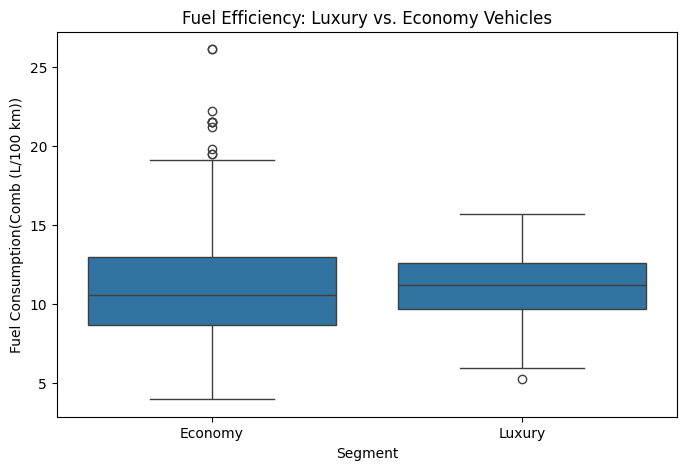

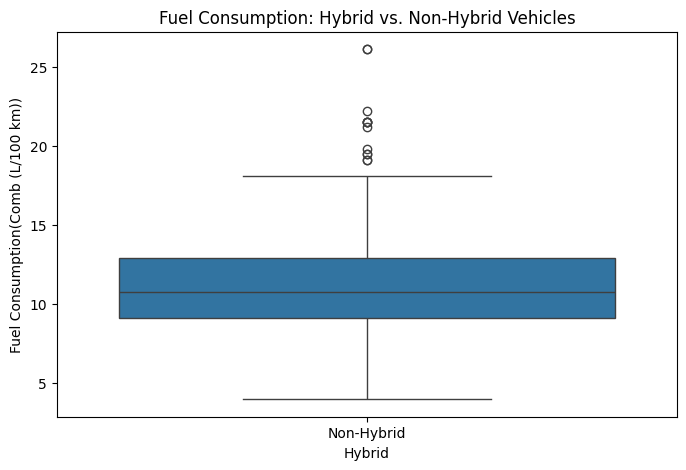

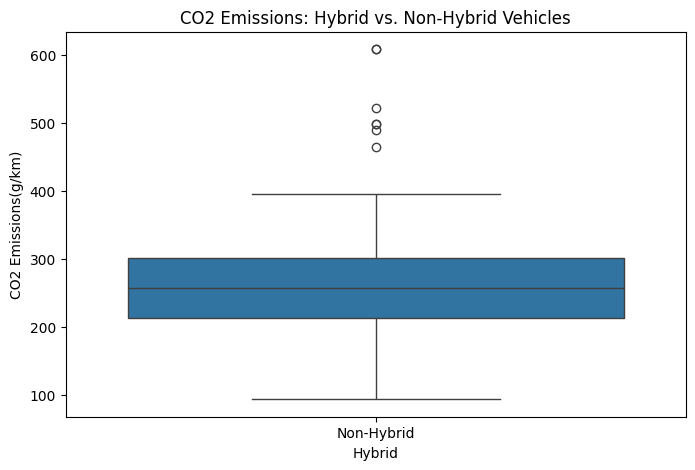

In [179]:


# Identify most fuel-efficient vehicles
efficient_vehicles = df.nsmallest(10, 'Fuel Consumption(Comb (L/100 km))')
print("Top 10 Most Fuel-Efficient Vehicles:")
print(efficient_vehicles[['Make', 'Model', 'Model Year', 'Fuel Consumption(Comb (L/100 km))', 'CO2 Emissions(g/km)']])

# Luxury vs. Economy Segmentation
luxury_brands = ['BMW', 'Mercedes-Benz', 'Audi', 'Lexus', 'Cadillac', 'Porsche']
df['Segment'] = df['Make'].apply(lambda x: 'Luxury' if x in luxury_brands else 'Economy')

# Compare fuel efficiency across segments
plt.figure(figsize=(8, 5))
sns.boxplot(x='Segment', y='Fuel Consumption(Comb (L/100 km))', data=df)
plt.title('Fuel Efficiency: Luxury vs. Economy Vehicles')
plt.show()

# Hybrid vs. Non-Hybrid Analysis
df['Hybrid'] = df['Fuel Type'].apply(lambda x: 'Hybrid' if 'Hybrid' in x else 'Non-Hybrid')

# Compare fuel consumption between hybrid and non-hybrid vehicles
plt.figure(figsize=(8, 5))
sns.boxplot(x='Hybrid', y='Fuel Consumption(Comb (L/100 km))', data=df)
plt.title('Fuel Consumption: Hybrid vs. Non-Hybrid Vehicles')
plt.show()

# Compare CO2 emissions between hybrid and non-hybrid vehicles
plt.figure(figsize=(8, 5))
sns.boxplot(x='Hybrid', y='CO2 Emissions(g/km)', data=df)
plt.title('CO2 Emissions: Hybrid vs. Non-Hybrid Vehicles')
plt.show()


In [180]:



le = LabelEncoder()
df['Vehicle Class'] = le.fit_transform(df['Vehicle Class'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df['Fuel Type'] = le.fit_transform(df['Fuel Type'])



In [181]:
df

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),...,CO2 Emissions(g/km),CO2 Rating,Smog Rating,Transmission Type,Power-to-Fuel Ratio,Cylinders per Liter,City-to-Highway Ratio,Gears,Segment,Hybrid
0,2022,Acura,ILX,0,2.4,4,7,3,9.9,7.0,...,200,6,3,Manual,0.279070,1.666667,1.414286,8.0,Economy,Non-Hybrid
1,2022,Acura,MDX SH-AWD,7,3.5,6,8,3,12.6,9.4,...,263,4,5,Automatic,0.312500,1.714286,1.340426,10.0,Economy,Non-Hybrid
2,2022,Acura,RDX SH-AWD,7,2.0,4,8,3,11.0,8.6,...,232,5,6,Automatic,0.202020,2.000000,1.279070,10.0,Economy,Non-Hybrid
3,2022,Acura,RDX SH-AWD A-SPEC,7,2.0,4,8,3,11.3,9.1,...,242,5,6,Automatic,0.194175,2.000000,1.241758,10.0,Economy,Non-Hybrid
4,2022,Acura,TLX SH-AWD,0,2.0,4,8,3,11.2,8.0,...,230,5,7,Automatic,0.204082,2.000000,1.400000,10.0,Economy,Non-Hybrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,7,2.0,4,12,3,10.7,7.7,...,219,5,5,Automatic,0.212766,2.000000,1.389610,8.0,Economy,Non-Hybrid
942,2022,Volvo,XC60 B5 AWD,7,2.0,4,12,3,10.5,8.1,...,219,5,5,Automatic,0.212766,2.000000,1.296296,8.0,Economy,Non-Hybrid
943,2022,Volvo,XC60 B6 AWD,7,2.0,4,12,3,11.0,8.7,...,232,5,7,Automatic,0.202020,2.000000,1.264368,8.0,Economy,Non-Hybrid
944,2022,Volvo,XC90 T5 AWD,8,2.0,4,12,3,11.5,8.4,...,236,5,5,Automatic,0.198020,2.000000,1.369048,8.0,Economy,Non-Hybrid


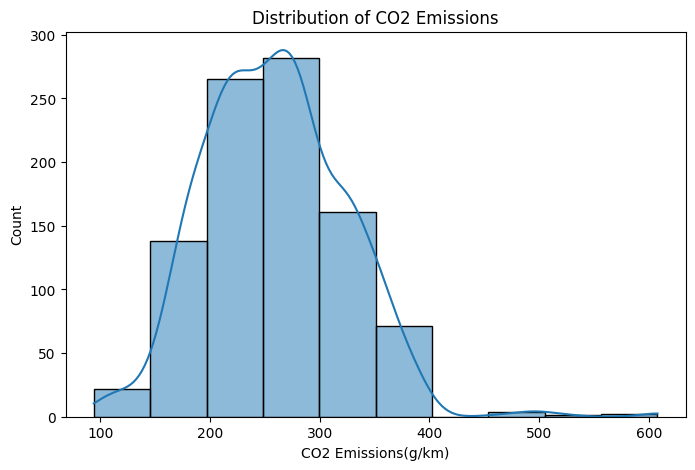

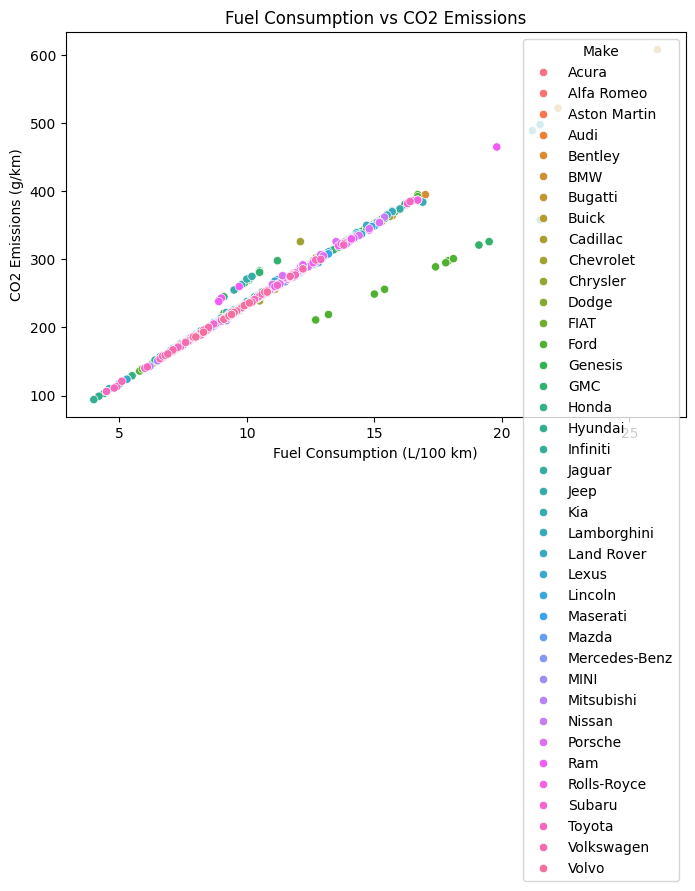

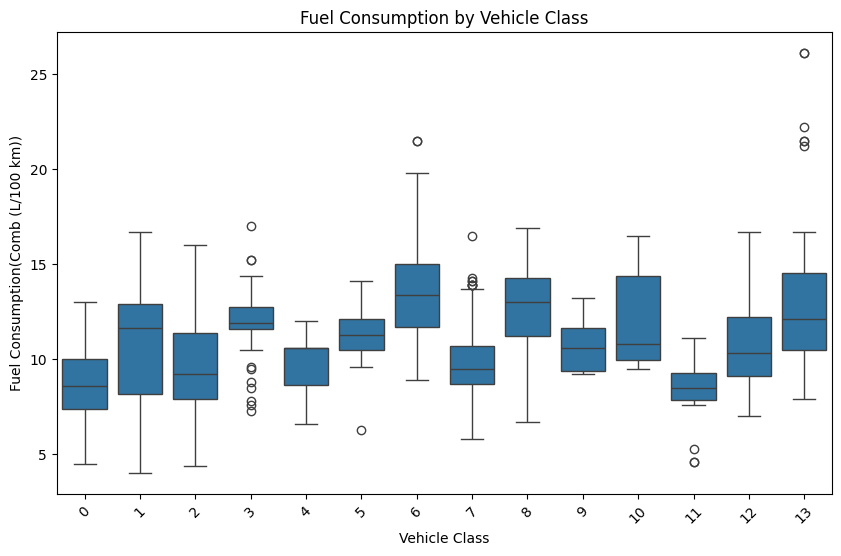

In [182]:
plt.figure(figsize=(8,5))
sns.histplot(df["CO2 Emissions(g/km)"], bins=10, kde=True)
plt.title("Distribution of CO2 Emissions")
plt.xlabel("CO2 Emissions(g/km)")
plt.show()

# Fuel Consumption vs CO2 Emissions
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Fuel Consumption(Comb (L/100 km))"], y=df["CO2 Emissions(g/km)"], hue=df["Make"])
plt.title("Fuel Consumption vs CO2 Emissions")
plt.xlabel("Fuel Consumption (L/100 km)")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

# Boxplot for Fuel Consumption by Vehicle Class
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Vehicle Class"], y=df["Fuel Consumption(Comb (L/100 km))"])
plt.xticks(rotation=45)
plt.title("Fuel Consumption by Vehicle Class")
plt.show()

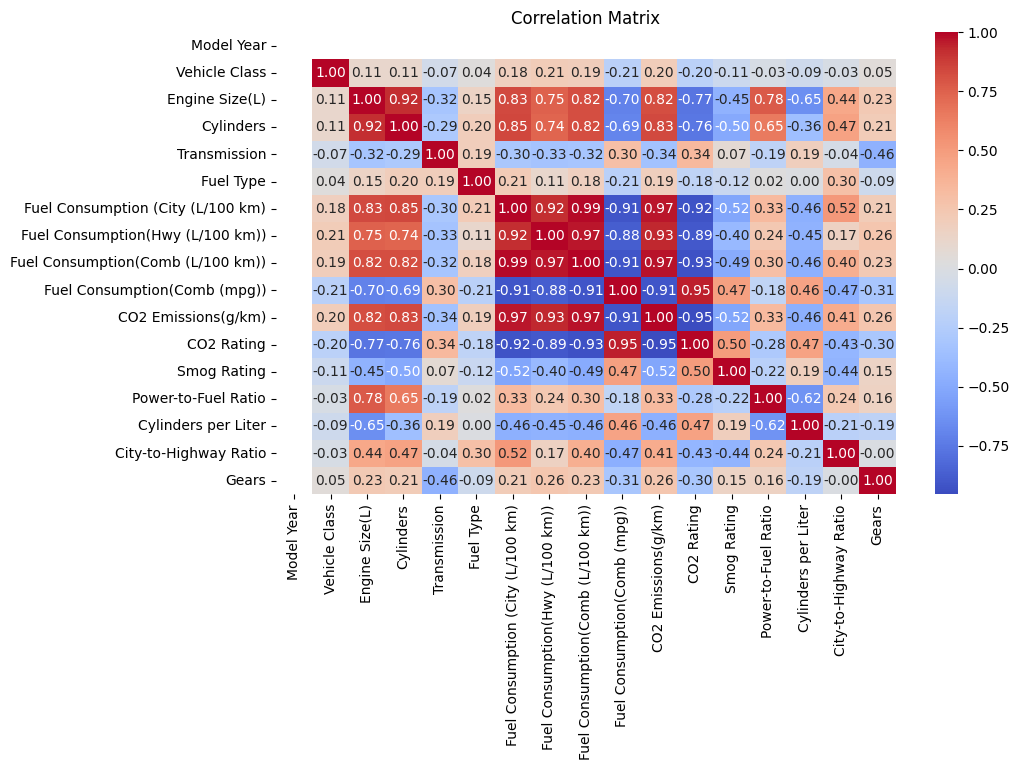

In [183]:
corr_matrix = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Modelling

In [184]:


X = df[['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type','CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating']]
y = df[['Fuel Consumption(Comb (L/100 km))']]
X.head(2)



,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,0,2.4,4,7,3,200,6,3
1,7,3.5,6,8,3,263,4,5


In [185]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [186]:


mlm = linear_model.LinearRegression()
mlm.fit (X_train, y_train)

LinearRegression()

# Model Evaluation

In [187]:
Yhat_mlm = mlm.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Multiple Linear regression:', metrics.mean_absolute_error(y_test, Yhat_mlm))
print('Mean Squared Error(MSE) of Multiple Linear regression:', metrics.mean_squared_error(y_test, Yhat_mlm))
print('Root Mean Squared Error (RMSE) of Multiple Linear regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_mlm)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Multiple Linear regression: %.2f' % mlm.score(X_train, y_train))
print('Explained Variance Score (EVS) of Multiple Linear regression:',explained_variance_score(y_test, Yhat_mlm))
#Residual sum of squares (rss)
print("Residual sum of squares of Multiple Linear regression: %.2f" % np.mean((Yhat_mlm - y_test) ** 2))
print('R2 of Multiple Linear regression:',metrics.r2_score(y_test, Yhat_mlm))

accuracy = mlm.score(X_test, y_test)
print("Accuracy of Multiple Linear regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Multiple Linear regression: 0.21411980305447506
Mean Squared Error(MSE) of Multiple Linear regression: 0.35268040897477826
Root Mean Squared Error (RMSE) of Multiple Linear regression: 0.5938690166819434
Variance score of Multiple Linear regression: 0.94
Explained Variance Score (EVS) of Multiple Linear regression: 0.9638669247653121
Residual sum of squares of Multiple Linear regression: 0.35
R2 of Multiple Linear regression: 0.9636159473257309
Accuracy of Multiple Linear regression: 0.9636159473257309
